In [1]:
import numpy as np
import random
from deap import base, creator, tools

In [2]:
#Create a class
creator.create('FitnessMax', base.Fitness, weights=(1.0,))
creator.create('Individual', list, fitness=creator.FitnessMax)

In [3]:
IND_SIZE = 10
TOURN_SIZE = 3
toolbox = base.Toolbox()
toolbox.register('attr_float', lambda: random.randint(0,1))
#Individuals
toolbox.register('individual', tools.initRepeat, creator.Individual, toolbox.attr_float, n=IND_SIZE)
#population
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

#Operators
#Crossover
toolbox.register('Crossover', tools.cxTwoPoint)
#Mutation
toolbox.register('Mutation', tools.mutFlipBit, indpb=0.5)
#Selection
toolbox.register('tournament-selection', tools.selTournament, tournsize=TOURN_SIZE)
toolbox.register('roulette', tools.selRoulette)

In [4]:
#Evaluate Function
def evaluate(individual):
    return sum(individual)
toolbox.register('evaluate', evaluate)

#Statistics
stats=tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register('avg', np.mean)
stats.register('std', np.std)
stats.register('min', np.min)
stats.register('max', np.max)

In [11]:
def GA(POP_SIZE, CXPB, MXPB, NGEN, stats):
    #Hall of Fame
    hof=tools.HallOfFame(1)
    
    pop=toolbox.population(n = POP_SIZE)
    print(pop)
    
    logbook=tools.Logbook()
    logbook.header=['Gen', 'nevals'] + (stats.fields if stats else[])
    
    fitness=list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitness):
        ind.fitness.values=[fit]
        
    hof.update(pop) if stats else {}
        
    record = stats.compile(pop) if stats else {}
    logbook.record(gen=0, nevals=len(pop), **record)
    
    for g in range(NGEN):
        print('Generation Numer', pop, 'Population', pop)
        #Select offspring
        offspring= toolbox.roulette(pop, len(pop))
        offspring=list(map(toolbox.clone, offspring))
        
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.Crossover(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if random.random()<MXPB:
                toolbox.Mutation(mutant)
                del mutant.fitness.values         
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitness = list(map(toolbox.evaluate, invalid_ind))
        for ind, fit in zip(invalid_ind, fitness):
            ind.fitness.values=[fit]
            
        if hof is not None:
            hof.update(offspring)
            print(hof)
            
        pop[:]=offspring
        
        record = stats.compile(pop) if stats else{}
        print(record)
        logbook.record(gen=g+1, nevals=len(invalid_ind), **record)
        
    return pop, logbook
            
            

In [12]:
GA_exe = GA(10, 0.8, 0.1, 40, stats)

[[0, 1, 1, 0, 1, 0, 0, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 0, 0, 1, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1, 0, 1], [1, 0, 0, 0, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0, 0, 1, 1, 0], [1, 1, 0, 0, 1, 1, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 0, 1, 1, 1, 0], [1, 1, 0, 0, 1, 1, 0, 1, 1, 1]]
Generation Numer [[0, 1, 1, 0, 1, 0, 0, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 0, 0, 1, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1, 0, 1], [1, 0, 0, 0, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0, 0, 1, 1, 0], [1, 1, 0, 0, 1, 1, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 0, 1, 1, 1, 0], [1, 1, 0, 0, 1, 1, 0, 1, 1, 1]] Population [[0, 1, 1, 0, 1, 0, 0, 1, 1, 1], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 0, 0, 1, 0, 1], [1, 0, 1, 0, 1, 1, 1, 1, 0, 1], [1, 0, 0, 0, 1, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0, 0, 1, 1, 0], [1, 1, 0, 0, 1, 1, 1, 0, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 0, 1, 1, 1, 0], [1, 1, 0, 0, 1, 1, 0, 1, 1, 1]]
[[1, 0, 1

In [13]:
GA_exe[1]

[{'gen': 0,
  'nevals': 10,
  'avg': 5.3,
  'std': 1.3453624047073711,
  'min': 3.0,
  'max': 7.0},
 {'gen': 1,
  'nevals': 9,
  'avg': 5.4,
  'std': 1.0198039027185568,
  'min': 3.0,
  'max': 7.0},
 {'gen': 2,
  'nevals': 10,
  'avg': 6.0,
  'std': 0.7745966692414834,
  'min': 5.0,
  'max': 7.0},
 {'gen': 3,
  'nevals': 6,
  'avg': 6.1,
  'std': 1.1357816691600546,
  'min': 4.0,
  'max': 8.0},
 {'gen': 4,
  'nevals': 6,
  'avg': 5.7,
  'std': 1.6155494421403513,
  'min': 3.0,
  'max': 8.0},
 {'gen': 5, 'nevals': 10, 'avg': 6.5, 'std': 1.5, 'min': 3.0, 'max': 8.0},
 {'gen': 6,
  'nevals': 8,
  'avg': 6.5,
  'std': 1.6278820596099706,
  'min': 4.0,
  'max': 9.0},
 {'gen': 7,
  'nevals': 8,
  'avg': 7.3,
  'std': 1.004987562112089,
  'min': 5.0,
  'max': 8.0},
 {'gen': 8,
  'nevals': 8,
  'avg': 7.6,
  'std': 1.1135528725660044,
  'min': 5.0,
  'max': 9.0},
 {'gen': 9, 'nevals': 9, 'avg': 7.7, 'std': 0.9, 'min': 7.0, 'max': 9.0},
 {'gen': 10,
  'nevals': 7,
  'avg': 7.0,
  'std': 1.18321

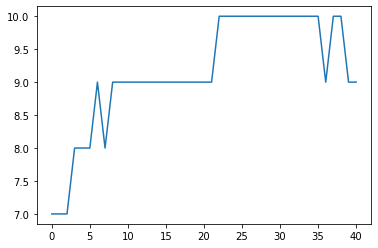

In [14]:
import matplotlib.pyplot as plt
max_values = [GA_exe[1][i]['max'] for i in range(len(GA_exe[1]))]
ngen = [i for i in range(len(GA_exe[1]))]

fig = plt.plot(ngen, max_values)
plt.show()

# Esercizio 2

Write a Python program that optimizes the Sphere Problem through a genetic algorithm and plots the best fitness against the number of generations.

$$ f(\mathbf{x}) = f(x_1, x_2, \ldots, x_n) = \sum_{i=0}^{n-1} x_i^2$$